In [4]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#use the citipy module to determine city based on latitude and longitude
from citipy import citipy
#import the datetime module from the datetime library
from datetime import datetime
#for API requests
import requests
#import the API key
from config import weather_api_key
# Import the time module.
import time
# Import linear regression from the SciPy stats module
from scipy.stats import linregress

In [5]:
#create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [6]:
#add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [7]:
#create a list for holding the cities
cities = []
#identify the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
#print the city count to confirm sufficient count
len(cities)

609

In [8]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+weather_api_key

In [9]:
#create an empty list to hold the weather data
city_data = []
#print the start of logging
print("Beginning Data Retrieval     ")
print("-----------------------------")

#initializee counters
record_count = 1
set_count = 1

#loop through all the cities in the list
for i, city in enumerate(cities):

    #group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    #create endpoint URL with each city
    city_url = url + "&q=" + city

    #log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    #add 1 to the record count
    record_count += 1
    
    #run an API request for each of the cities
    try:
        #parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        #parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        #convert the date to ISO standard
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        #append the city information into city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

#if an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

#indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | dikson
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | hasaki
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | alice springs
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | esperance
Processing Record 16 of Set 1 | los llanos de aridane
Processing Record 17 of Set 1 | stoyba
City not found. Skipping...
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | seoul
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | castro
Processing Record 22 of Set 1 | port h

Processing Record 36 of Set 4 | panzhihua
Processing Record 37 of Set 4 | saldanha
Processing Record 38 of Set 4 | newport
Processing Record 39 of Set 4 | mirpur mathelo
Processing Record 40 of Set 4 | severo-kurilsk
Processing Record 41 of Set 4 | port macquarie
Processing Record 42 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 43 of Set 4 | coahuayana
Processing Record 44 of Set 4 | sabha
Processing Record 45 of Set 4 | leningradskiy
Processing Record 46 of Set 4 | falmouth
Processing Record 47 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 48 of Set 4 | bathsheba
Processing Record 49 of Set 4 | formoso do araguaia
City not found. Skipping...
Processing Record 50 of Set 4 | havelock
Processing Record 1 of Set 5 | bauta
Processing Record 2 of Set 5 | malanje
Processing Record 3 of Set 5 | bubaque
Processing Record 4 of Set 5 | rio grande
Processing Record 5 of Set 5 | lebu
Processing Record 6 of Set 5 | redcar
Processing Record 7 of Set 5 

City not found. Skipping...
Processing Record 25 of Set 8 | raga
Processing Record 26 of Set 8 | mercedes
Processing Record 27 of Set 8 | grenfell
Processing Record 28 of Set 8 | aldan
Processing Record 29 of Set 8 | kahului
Processing Record 30 of Set 8 | mildura
Processing Record 31 of Set 8 | pallasovka
Processing Record 32 of Set 8 | cururupu
Processing Record 33 of Set 8 | cabo san lucas
Processing Record 34 of Set 8 | ancud
Processing Record 35 of Set 8 | xam nua
Processing Record 36 of Set 8 | nabire
Processing Record 37 of Set 8 | horconcitos
Processing Record 38 of Set 8 | kuhestan
City not found. Skipping...
Processing Record 39 of Set 8 | raudeberg
Processing Record 40 of Set 8 | nome
Processing Record 41 of Set 8 | saryozek
Processing Record 42 of Set 8 | shibetsu
Processing Record 43 of Set 8 | birjand
Processing Record 44 of Set 8 | luanda
Processing Record 45 of Set 8 | tiarei
Processing Record 46 of Set 8 | wahiawa
Processing Record 47 of Set 8 | agropoli
Processing Rec

Processing Record 9 of Set 12 | necochea
Processing Record 10 of Set 12 | young
Processing Record 11 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 12 of Set 12 | darnah
Processing Record 13 of Set 12 | uporovo
Processing Record 14 of Set 12 | malakal
Processing Record 15 of Set 12 | the valley
Processing Record 16 of Set 12 | shetpe
Processing Record 17 of Set 12 | boysun
Processing Record 18 of Set 12 | chernyshevskiy
Processing Record 19 of Set 12 | grand centre
City not found. Skipping...
Processing Record 20 of Set 12 | mount isa
Processing Record 21 of Set 12 | sao gabriel da cachoeira
Processing Record 22 of Set 12 | luang prabang
Processing Record 23 of Set 12 | fort morgan
Processing Record 24 of Set 12 | kaeo
Processing Record 25 of Set 12 | ambon
Processing Record 26 of Set 12 | san francisco
Processing Record 27 of Set 12 | bengkalis
City not found. Skipping...
Processing Record 28 of Set 12 | riyadh
Processing Record 29 of Set 12 | turiacu
Processing Re

In [10]:
len(city_data)

550

In [11]:
#convert the array of dictionaries to a dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.60,-73.97,42.01,75,98,3.00,US,2020-04-18 17:19:48
1,Bilibino,68.05,166.44,-8.21,81,13,5.03,RU,2020-04-18 17:16:20
2,Mataura,-46.19,168.86,44.01,93,100,3.00,NZ,2020-04-18 17:19:49
3,Rikitea,-23.12,-134.97,76.78,70,1,4.68,PF,2020-04-18 17:19:49
4,Georgetown,5.41,100.34,82.40,88,20,4.70,MY,2020-04-18 17:18:22
5,Dikson,73.51,80.55,35.91,91,100,18.05,RU,2020-04-18 17:19:50
6,Ilulissat,69.22,-51.10,24.80,79,75,4.70,GL,2020-04-18 17:19:50
7,Hasaki,35.73,140.83,52.00,76,40,8.05,JP,2020-04-18 17:15:49
8,Butaritari,3.07,172.79,82.04,78,98,14.43,KI,2020-04-18 17:19:51
9,Alice Springs,-23.70,133.88,64.40,48,0,9.64,AU,2020-04-18 17:19:52


In [12]:
new_column_order = ["City", "Country", "Date","Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2020-04-18 17:19:48,42.60,-73.97,42.01,75,98,3.00
1,Bilibino,RU,2020-04-18 17:16:20,68.05,166.44,-8.21,81,13,5.03
2,Mataura,NZ,2020-04-18 17:19:49,-46.19,168.86,44.01,93,100,3.00
3,Rikitea,PF,2020-04-18 17:19:49,-23.12,-134.97,76.78,70,1,4.68
4,Georgetown,MY,2020-04-18 17:18:22,5.41,100.34,82.40,88,20,4.70
...,...,...,...,...,...,...,...,...,...
545,Puksoozero,RU,2020-04-18 17:24:50,62.59,40.61,30.16,97,85,3.53
546,Wad Rawah,SD,2020-04-18 17:24:50,15.16,33.14,86.22,12,87,11.43
547,Aloleng,PH,2020-04-18 17:24:51,16.13,119.78,81.45,77,61,6.44
548,Santana Do Livramento,BR,2020-04-18 17:24:51,-30.89,-55.53,77.45,34,0,7.74


In [13]:
#create the output file (CSV)
output_data_file = "weather_data/cities.csv"
#export the City_Data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
#extract relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

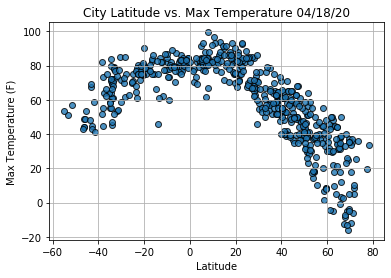

In [15]:
#build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig1.png")

#show plot
plt.show()

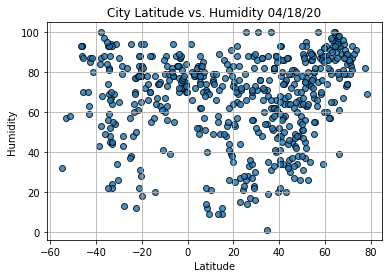

In [16]:
#build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig2.png")

#show plot
plt.show()

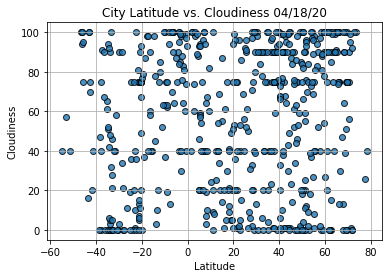

In [17]:
#build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig3.png")

#show plot
plt.show()

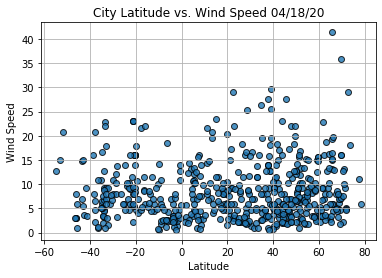

In [18]:
#build the scatter plot for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

#incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

#save the figure
plt.savefig("weather_data/Fig4.png")

#show plot
plt.show()

In [19]:
#perform linear regression to predict max_temp for lat 
(slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temps)
#get the equation of the line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

#calculate regression line "y values" from the slope and intercept and create new list
regress_values = [(lat * slope + intercept) for lat in lats]

y = -0.44x + 68.73
The p-value is: 0.000


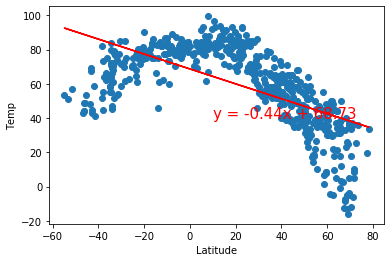

In [20]:
#create a scatter plot of latitues and max_temps
plt.scatter(lats,max_temps)
#plot regression line with latitues (x axis) and predicted max_temps (regress_values) as y axis, and color red
plt.plot(lats,regress_values,"r")
#annotate with line equation as text, add coordinates, axes titles, and color red
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [21]:
index_13=city_data_df.loc[13]
index_13


City                 San Patricio
Country                        MX
Date          2020-04-18 17:19:54
Lat                         19.22
Lng                        -104.7
Max Temp                     82.4
Humidity                       78
Cloudiness                     20
Wind Speed                   8.05
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4       True
       ...  
545     True
546     True
547     True
548    False
549     True
Name: Lat, Length: 550, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2020-04-18 17:19:48,42.60,-73.97,42.01,75,98,3.00
1,Bilibino,RU,2020-04-18 17:16:20,68.05,166.44,-8.21,81,13,5.03
4,Georgetown,MY,2020-04-18 17:18:22,5.41,100.34,82.40,88,20,4.70
5,Dikson,RU,2020-04-18 17:19:50,73.51,80.55,35.91,91,100,18.05
6,Ilulissat,GL,2020-04-18 17:19:50,69.22,-51.10,24.80,79,75,4.70
...,...,...,...,...,...,...,...,...,...
544,Hay River,CA,2020-04-18 17:21:41,60.82,-115.80,30.20,74,75,4.70
545,Puksoozero,RU,2020-04-18 17:24:50,62.59,40.61,30.16,97,85,3.53
546,Wad Rawah,SD,2020-04-18 17:24:50,15.16,33.14,86.22,12,87,11.43
547,Aloleng,PH,2020-04-18 17:24:51,16.13,119.78,81.45,77,61,6.44


In [24]:
#create northern and southern hemisphere dataframes
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


In [36]:
#function for linear regression equation and plot regression line with labels  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    #rn regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    #calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    #get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    #annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    print(f"The r-value is: {r_value:.3f}")

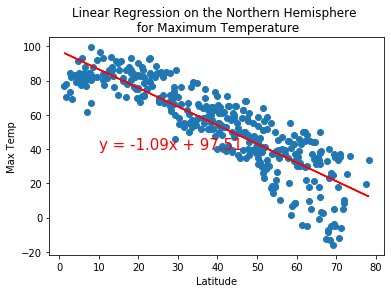

The r-value is: -0.866


In [37]:
#linear regression on the northern_hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
#call regression function
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

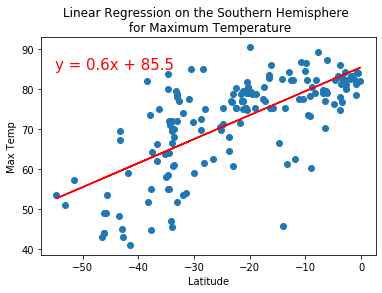

The r-value is: 0.696


In [38]:
#linear regression on the southern_hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
#call regression function
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,85))

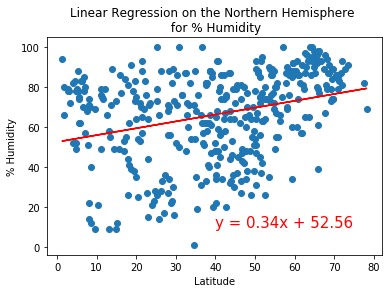

The r-value is: 0.306


In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

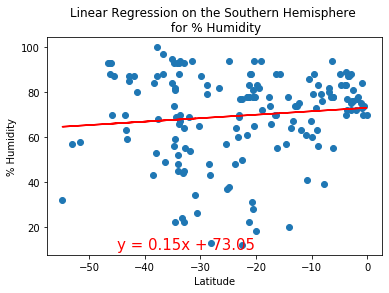

The r-value is: 0.108


In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-45,10))

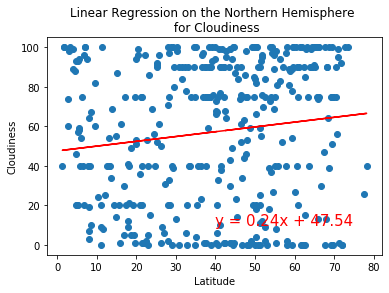

The r-value is: 0.133


In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Cloudiness', 'Cloudiness',(40,10))

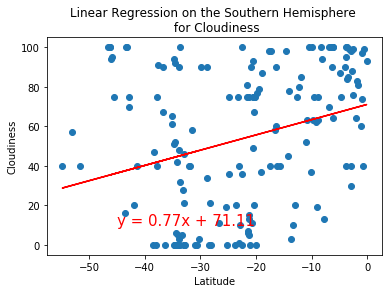

The r-value is: 0.296


In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Cloudiness', 'Cloudiness',(-45,10))

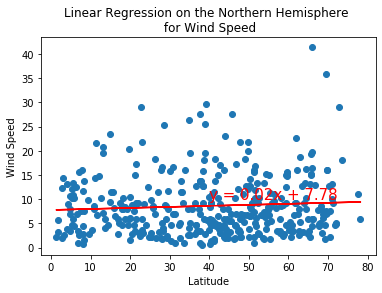

The r-value is: 0.067


In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,10))

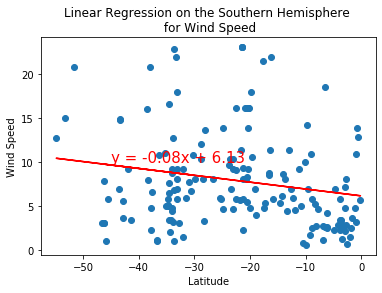

The r-value is: -0.195


In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-45,10))